# Genetic Algorithm

<b>유전 알고리즘(genetic algorithm, GA)</b>은 메타휴리스틱스의 고전이며 진화알고리즘 등 여러 이론의 바탕이 되었으며 1975년 Holland가 소개하였습니다. 유전 알고리즘은 진화이론에서 사용하는 개념과 용어를 사용하고 있는데, 이는 유전자에서 발생하는 진화 현상을 모방하여 만들어졌기 때문입니다. 유전 알고리즘은 가능해의 집합(해집단)을 형성하여 그 집합에서 목적함수와 연관된 적합도를 평가한 후, 개체의 적합도에 따라 자연 선택하여 새로운 집합을 만듭니다. 그 후 집합의 개체들 간 유전연산(이종교배, 돌연변이)을 적용하여 새로운 종들을 만든 후 그 종들의 적합도를 평가합니다. 그리고 다시 자연선택으로 새로운 종들을 형성하는 과정을 반복합니다. 반복되는 과정을 통해 자연에서의 진화현상에서 뛰어난 종들이 살아남듯, 유전 알고리즘도 마찬가지로 뛰어난 해들이 남을 것이라 기대할 수 있습니다. 실제 유전 알고리즘를 적용할 때는 명확하게 설정해야 할 작업들이 많아지게 되고, 이에 따라 적용의 융통성도 많습니다. 스키마 이론을 통하여 부분적으로 설명되고는 있으나, 아직 유전 알고리즘이 최적해로 수렴한다는 것은 완벽하지 못합니다만, 그럼에도 연구자들의 많은 관심을 받는 이유는 진화 과정이 자연계에서 오랫동안 성공적으로 수행되고 있기 때문입니다.

## Structure of Genetic Algorithm

<p style="text-indent: 1.5em">유전 알고리즘은 해를 표현한 염색체(chromosome)라는 개체들로 이루어진 해집단을 가지고 시작합니다. 해집단은 세대마다 일정 수의 개체를 유지하고 적합도를 평가하여 다음 세대에 생존할 개체를 중복 허용하여 확률적으로 선택(selection)합니다. 선택된 개체들 중 일부의 개체들은 짝(parent)을 지어 자손(children or offspring)을 낳습니다. 이를 교차(crossover)라고 하고 생산되는 자손 유전자 중, 돌연변이(mutation)가 발현될 수도 있습니다. 이러한 진화 과정이 종료조건을 만족할 때까지 반복합니다. 이것이 유전 알고리즘입니다.</p>
    
### Representation

<p style="text-indent: 1.5em">유전 알고리즘을 적용하는데 가장 중요한 단계로 해를 어떻게 표현할 것인가를 고민해야 합니다. 해의 표현은 유전 알고리즘의 적합도 평가와 유전연산자 적용 등에 영향을 주기 때문에 문제의 특성을 정확하게 반영해야 합니다. 예를 들어, 함수 $f(x)=x^2+5.0$를 최대화하는 변수 값 $x$를 찾는다고 생각해봅시다. 그리고 $x$는 $0\lt x\le 31$보다 작은 정수라는 제약조건도 있다고 가정합시다. $0$은 $[0 0 0 0 0]$과 $31$은 $[1 1 1 1 1]$로 표현되며, $x$를 5비트의 2진수 벡터로 표현할 수 있습니다. 유전 알고리즘에서 이진수 벡터를 생성하는 것을 인코딩(encoding) 그리고 이를 해석하여 해로 표현하는 과정을 디코딩(decoding)이라고도 합니다. 파이썬으로 구현하면 다음과 같습니다.</p>

In [1]:
import numpy as np

def decoding(chromosome):
    decimal = 0
    for i, v in enumerate(reversed(chromosome)):
        decimal += v * 2**i
    return decimal

population = np.random.randint(0, 2, size=(10,5))

for chromosome in population:
    print('Chromosome: {} Decimal: {}'.format(chromosome, decoding(chromosome)))

Chromosome: [1 0 0 1 1] Decimal: 19
Chromosome: [1 1 1 1 0] Decimal: 30
Chromosome: [1 1 0 0 0] Decimal: 24
Chromosome: [0 0 1 0 1] Decimal: 5
Chromosome: [1 1 1 1 1] Decimal: 31
Chromosome: [1 0 0 0 0] Decimal: 16
Chromosome: [0 1 0 0 0] Decimal: 8
Chromosome: [0 0 0 0 1] Decimal: 1
Chromosome: [1 1 0 0 1] Decimal: 25
Chromosome: [1 0 0 1 1] Decimal: 19


### Evaluate Fitness

<p style="text-indent: 1.5em">적합도(fitness)는 유전 알고리즘에서 최적화하려는 목적입니다. 

In [162]:
def fitness(chromosome):
    return decoding(chromosome)**2 + 5.0

for chromosome in population:
    print('Chromosome: {} Decimal: {} Fitness: {}'.format(chromosome, decoding(chromosome), fitness(chromosome)))

Chromosome: [0, 1, 1, 0, 1] Decimal: 13 Fitness: 174.0
Chromosome: [1, 0, 1, 0, 0] Decimal: 20 Fitness: 405.0
Chromosome: [0, 1, 0, 0, 1] Decimal: 9 Fitness: 86.0
Chromosome: [1, 0, 0, 0, 0] Decimal: 16 Fitness: 261.0
Chromosome: [1, 1, 0, 0, 1] Decimal: 25 Fitness: 630.0
Chromosome: [1, 1, 0, 1, 0] Decimal: 26 Fitness: 681.0
Chromosome: [1, 0, 0, 1, 1] Decimal: 19 Fitness: 366.0
Chromosome: [0, 1, 1, 1, 1] Decimal: 15 Fitness: 230.0
Chromosome: [0, 0, 0, 1, 0] Decimal: 2 Fitness: 9.0
Chromosome: [0, 0, 0, 0, 1] Decimal: 1 Fitness: 6.0


### Selection

<p style="text-indent: 1.5em">선택은 염색체의 적합도에 기초하여 해집단에서 다음 세대에 생존할 염색체를 고르는 과정입니다. 유전 알고리즘에서 선택은 다양성(diviersity)와 선택압력(selective pressure)이 조화를 이룰 수 있어야 합니다. 선택방법에는 룰렛휠(roulette wheel), 순위(ranking), 토너먼트(tournament) 등이 있습니다.</p> 

In [263]:
from collections import defaultdict
from operator import getitem 

def ranking_selection(population, n):
    result = defaultdict(dict)
    for i, chromosome in enumerate(population):
        result[i]['Chromosome'] = chromosome
        result[i]['Decimal'] = decoding(chromosome)
        result[i]['Fitness'] = fitness(chromosome)
        
    result = sorted(result.items(), key=lambda x: x[1]['Fitness'], reverse=True)
    
    total = np.sum([i[1]['Fitness'] for i in result])
    for i in result:
        i[1]['Prob.'] = np.round(i[1]['Fitness'] / total, 3)
        
    tmp = []
    while n:
        loop = True
        while loop:
            for i in result:
                if i[1]['Prob.'] >= np.random.rand():
                    tmp.append(i[1])
                    selected = True
                    break
            if selected:
                loop = False

        n -= 1
    return result, tmp

In [264]:
selected, t = ranking_selection(population, 3)
for i in selected:
    print(i)

(5, {'Chromosome': [1, 1, 0, 1, 0], 'Decimal': 26, 'Fitness': 681.0, 'Prob.': 0.239})
(4, {'Chromosome': [1, 1, 0, 0, 1], 'Decimal': 25, 'Fitness': 630.0, 'Prob.': 0.221})
(1, {'Chromosome': [1, 0, 1, 0, 0], 'Decimal': 20, 'Fitness': 405.0, 'Prob.': 0.142})
(6, {'Chromosome': [1, 0, 0, 1, 1], 'Decimal': 19, 'Fitness': 366.0, 'Prob.': 0.129})
(3, {'Chromosome': [1, 0, 0, 0, 0], 'Decimal': 16, 'Fitness': 261.0, 'Prob.': 0.092})
(7, {'Chromosome': [0, 1, 1, 1, 1], 'Decimal': 15, 'Fitness': 230.0, 'Prob.': 0.081})
(0, {'Chromosome': [0, 1, 1, 0, 1], 'Decimal': 13, 'Fitness': 174.0, 'Prob.': 0.061})
(2, {'Chromosome': [0, 1, 0, 0, 1], 'Decimal': 9, 'Fitness': 86.0, 'Prob.': 0.03})
(8, {'Chromosome': [0, 0, 0, 1, 0], 'Decimal': 2, 'Fitness': 9.0, 'Prob.': 0.003})
(9, {'Chromosome': [0, 0, 0, 0, 1], 'Decimal': 1, 'Fitness': 6.0, 'Prob.': 0.002})


#### dd

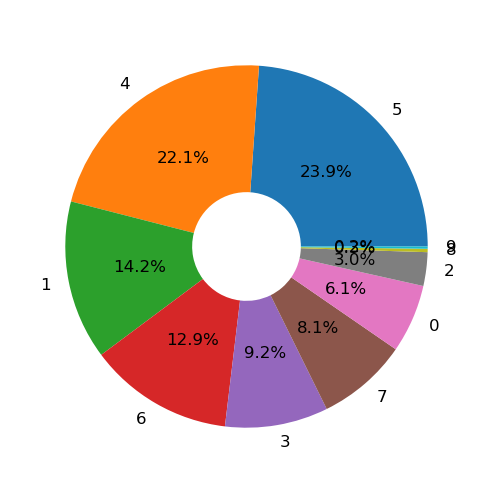

In [288]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3,3), dpi=200)

x = [i[1]['Prob.'] for i in selected]
labels = [i[0] for i in selected]

ax.pie(x, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.7), textprops={'size': 6})
plt.show()

In [184]:
[i[1]['Fitness'] for i in result]

NameError: name 'result' is not defined

In [179]:
for i in selected:
    print(i[1]['Fitness'])

681.0
630.0
405.0
366.0
261.0
230.0
174.0
86.0
9.0
6.0


In [ ]:
class Individual:
    def __init__(self, solution):
        self.solution = solution
        self.decimal = decoding(self.solution)
        self.fitness = fitness(self.solution)

In [17]:
value = 0
for i, v in enumerate(sorted(gene, reverse=True)):
    print(i, v, v * 2**i)
    value += v * 2**i

0 1 1
1 1 2
2 1 4
3 1 8
4 1 16


In [18]:
value

31

In [6]:
np.sum(gene*(2**len(gene)))

160

In [ ]:
class GeneticAlgorithm:
    def __init__(self):
        pass
    
    def _chromosome(self):
        pass
    
    def _population(self):
        pass
    
    def _selection(self):
        pass
    
    def _roulettewheel(self):
        pass
    
    def _crossover(self):
        pass
    
    def _mutation(self):
        pass
    
    def _next(self):
        pass